
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Felicidades Erick! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

## Análisis Exploratorio de Datos y Prueba de Hipótesis - Sistema de Taxis Chicago

## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings



<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo al separar la importación de bibliotecas de la carga de los datasets! Esto mejora la estructura y claridad de tu código.

</div>

## 4: Análisis Exploratorio de Datos


### 4.1 Importación y Exploración Inicial de los Datasets

In [2]:
# Cargar los datasets
df_trips_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_avg_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

# Exploración inicial del dataset de compañías
print("Dataset de compañías de taxis - Primeras filas:")
print(df_trips_company.head())
print("\nInformación del dataset:")
print(df_trips_company.info())
print("\nEstadísticas descriptivas:")
print(df_trips_company.describe())

# Exploración inicial del dataset de barrios
print("\n\nDataset de barrios - Primeras filas:")
print(df_avg_trips.head())
print("\nInformación del dataset:")
print(df_avg_trips.info())
print("\nEstadísticas descriptivas:")
print(df_avg_trips.describe())

Dataset de compañías de taxis - Primeras filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Estadísticas descriptivas:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000


Dataset de barrios - Primeras filas:
  dropoff_location_name  average_trips
0                  Lo

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo estudiando los datasets! Esto es fundamental para entender los datos y planificar el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda dejar comentarios sobre tus análisis de los mismos. Además, podrías separar mejor las celdas de código para poder dejar comentarios parciales.  

</div>

</div>

### 4.2 Limpieza y Validación de Tipos de Datos

In [3]:
# Verificar y limpiar datos nulos
print("Valores nulos en dataset de compañías:")
print(df_trips_company.isnull().sum())

print("\nValores nulos en dataset de barrios:")
print(df_avg_trips.isnull().sum())

# Verificar tipos de datos y corregir si es necesario
df_trips_company['trips_amount'] = df_trips_company['trips_amount'].astype('int64')
df_avg_trips['average_trips'] = df_avg_trips['average_trips'].astype('float64')

print("\nTipos de datos después de la corrección:")
print("Compañías:", df_trips_company.dtypes)
print("Barrios:", df_avg_trips.dtypes)

Valores nulos en dataset de compañías:
company_name    0
trips_amount    0
dtype: int64

Valores nulos en dataset de barrios:
dropoff_location_name    0
average_trips            0
dtype: int64

Tipos de datos después de la corrección:
Compañías: company_name    object
trips_amount     int64
dtype: object
Barrios: dropoff_location_name     object
average_trips            float64
dtype: object


### 4.3 Análisis de las Empresas de Taxis

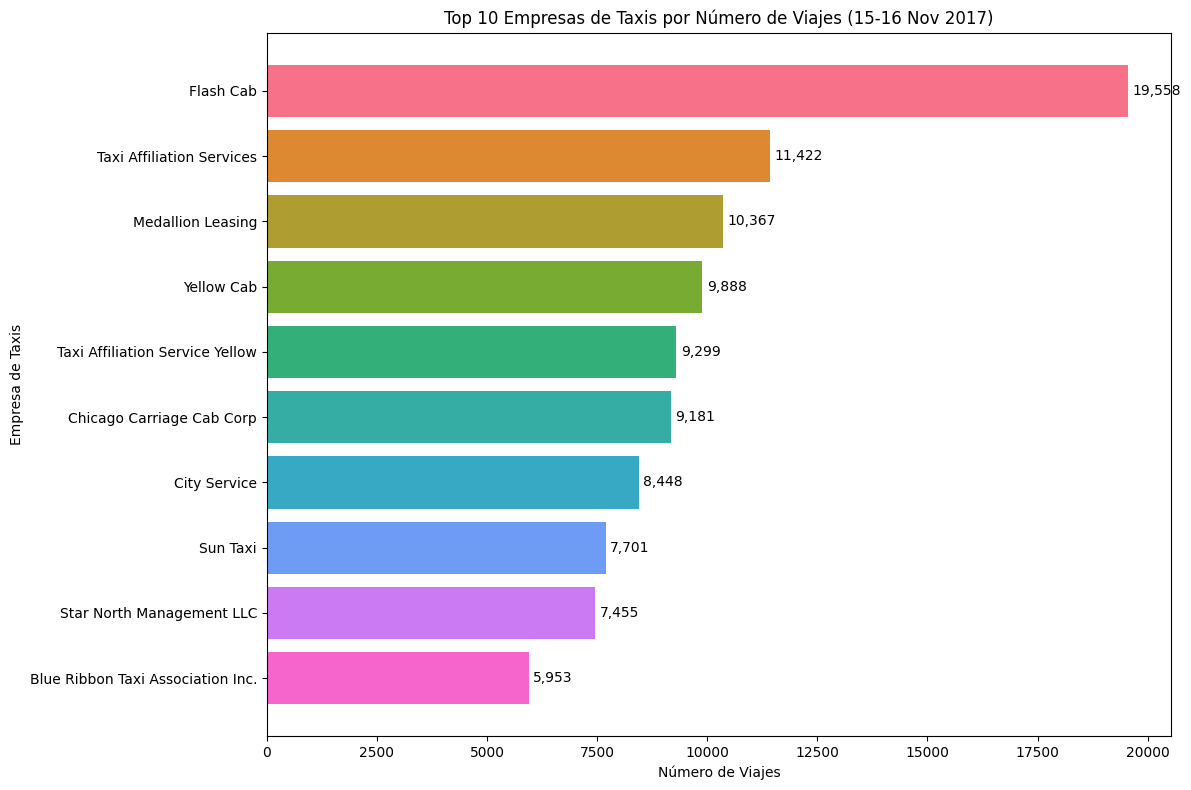

Total de viajes: 137,311
Viajes de top 10 empresas: 99,272
Participación de mercado del top 10: 72.30%


In [4]:
# Identificar las top 10 empresas por número de viajes
top_10_companies = df_trips_company.nlargest(10, 'trips_amount')

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_companies['company_name'], top_10_companies['trips_amount'], 
                color=sns.color_palette("husl", len(top_10_companies)))
plt.xlabel('Número de Viajes')
plt.ylabel('Empresa de Taxis')
plt.title('Top 10 Empresas de Taxis por Número de Viajes (15-16 Nov 2017)')
plt.gca().invert_yaxis()

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, 
             f'{int(width):,}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Análisis adicional - CÓDIGO CORREGIDO
total_trips = df_trips_company['trips_amount'].sum()  # CORREGIDO: 'trips_amount' sin tilde invertida
top_10_total = top_10_companies['trips_amount'].sum()
market_share = (top_10_total / total_trips) * 100

print(f"Total de viajes: {total_trips:,}")
print(f"Viajes de top 10 empresas: {top_10_total:,}")
print(f"Participación de mercado del top 10: {market_share:.2f}%")

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Correcto! El gráfico es correcto y refleja adecuadamente el resultado esperado.


</div>

### 4.4 Análisis de los Barrios por Finalizaciones

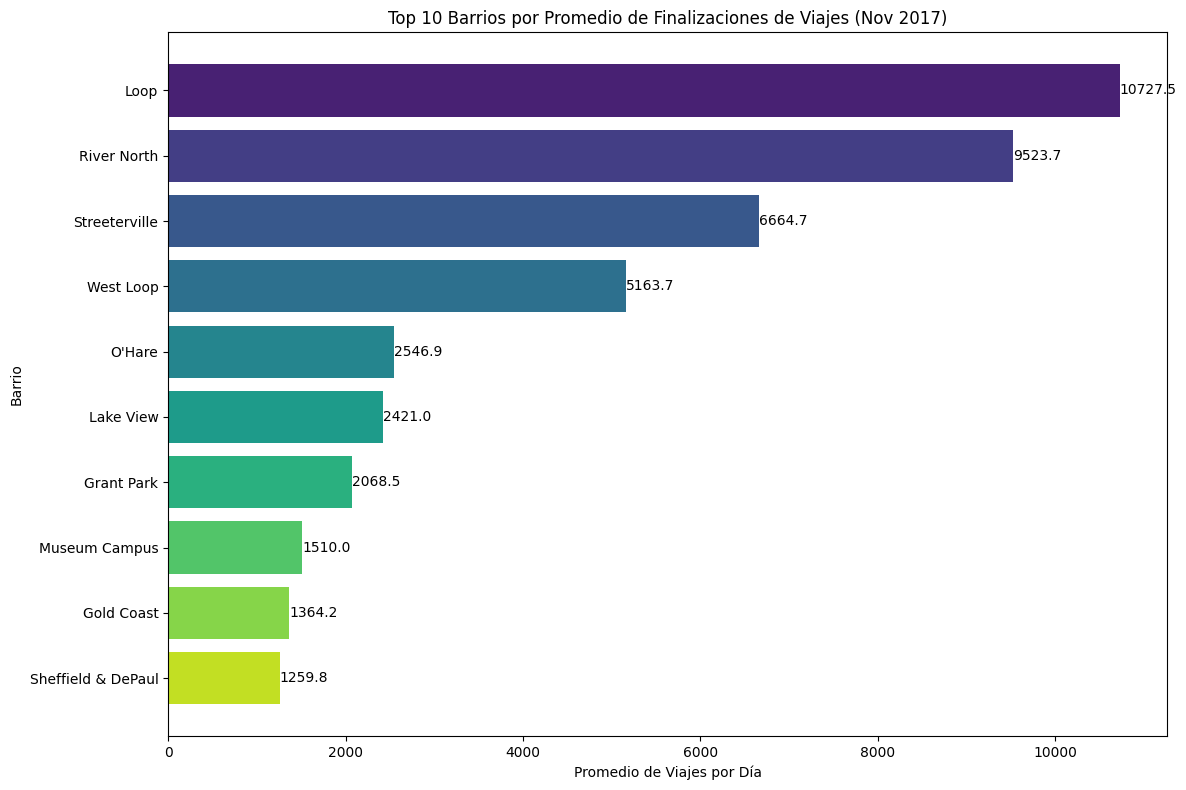

Estadísticas de los barrios top 10:
count       10.000000
mean      4324.986667
std       3530.183508
min       1259.766667
25%       1649.633333
50%       2483.933333
75%       6289.416667
max      10727.466667
Name: average_trips, dtype: float64


In [5]:
# Identificar los top 10 barrios por promedio de finalizaciones
top_10_neighborhoods = df_avg_trips.nlargest(10, 'average_trips')

plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_neighborhoods['dropoff_location_name'], 
                top_10_neighborhoods['average_trips'], 
                color=sns.color_palette("viridis", len(top_10_neighborhoods)))
plt.xlabel('Promedio de Viajes por Día')
plt.ylabel('Barrio')
plt.title('Top 10 Barrios por Promedio de Finalizaciones de Viajes (Nov 2017)')
plt.gca().invert_yaxis()

# Añadir valores en las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', ha='left', va='center')

plt.tight_layout()
plt.show()

# Análisis adicional
print("Estadísticas de los barrios top 10:")
print(top_10_neighborhoods['average_trips'].describe())

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

El gráfico de barras con el top 10 por barrios es excelente y los resultados son los esperados. 

</div>

### 4.5 Conclusiones del Análisis Exploratorio

Análisis de Empresas de Taxis:

Flash Cab domina el mercado con una cantidad significativamente mayor de viajes

Existe una alta concentración en las primeras 3-4 empresas

El mercado muestra una distribución de poder desigual

Análisis de Barrios:

Los barrios del centro (Loop, River North) son los más populares para finalizar viajes

Existe una clara preferencia por áreas comerciales y de negocios

La distribución geográfica de finalizaciones refleja la actividad económica de la ciudad

## 5: Prueba de Hipótesis

### 5.1 Carga y Exploración del Dataset

In [6]:
# Cargar el dataset de viajes al aeropuerto
df_airport_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

# Exploración inicial
print("Dataset de viajes al aeropuerto - Primeras filas:")
print(df_airport_trips.head())
print("\nInformación del dataset:")
print(df_airport_trips.info())
print("\nEstadísticas descriptivas:")
print(df_airport_trips.describe())

# Verificar valores nulos y tipos de datos
print("\nValores nulos:")
print(df_airport_trips.isnull().sum())

# Convertir start_ts a datetime
df_airport_trips['start_ts'] = pd.to_datetime(df_airport_trips['start_ts'])

Dataset de viajes al aeropuerto - Primeras filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None

Estadísticas descriptivas:
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%    

### 5.2 Preparación de los Datos

In [7]:
# Separar en dos grupos: sábados lluviosos vs otros sábados
rainy_saturdays = df_airport_trips[
    (df_airport_trips['weather_conditions'] == 'Bad') & 
    (df_airport_trips['start_ts'].dt.dayofweek == 5)  # 5 = sábado
]

other_saturdays = df_airport_trips[
    (df_airport_trips['weather_conditions'] == 'Good') & 
    (df_airport_trips['start_ts'].dt.dayofweek == 5)
]

print(f"Muestra sábados lluviosos: {len(rainy_saturdays)} viajes")
print(f"Muestra otros sábados: {len(other_saturdays)} viajes")

# Estadísticas descriptivas de ambos grupos
print("\nEstadísticas sábados lluviosos:")
print(rainy_saturdays['duration_seconds'].describe())

print("\nEstadísticas otros sábados:")
print(other_saturdays['duration_seconds'].describe())

Muestra sábados lluviosos: 180 viajes
Muestra otros sábados: 888 viajes

Estadísticas sábados lluviosos:
count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Estadísticas otros sábados:
count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64


### 5.3 Formulación de Hipótesis

Hipótesis Nula (H₀):
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia significativamente los sábados lluviosos.

Hipótesis Alternativa (H₁):
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SI cambia significativamente los sábados lluviosos.

Nivel de significación (α): 0.05

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo formulando la hipótesis! Es fundamental que sea claro lo que se busca analizar.

</div>

### 5.4 Prueba de Hipótesis

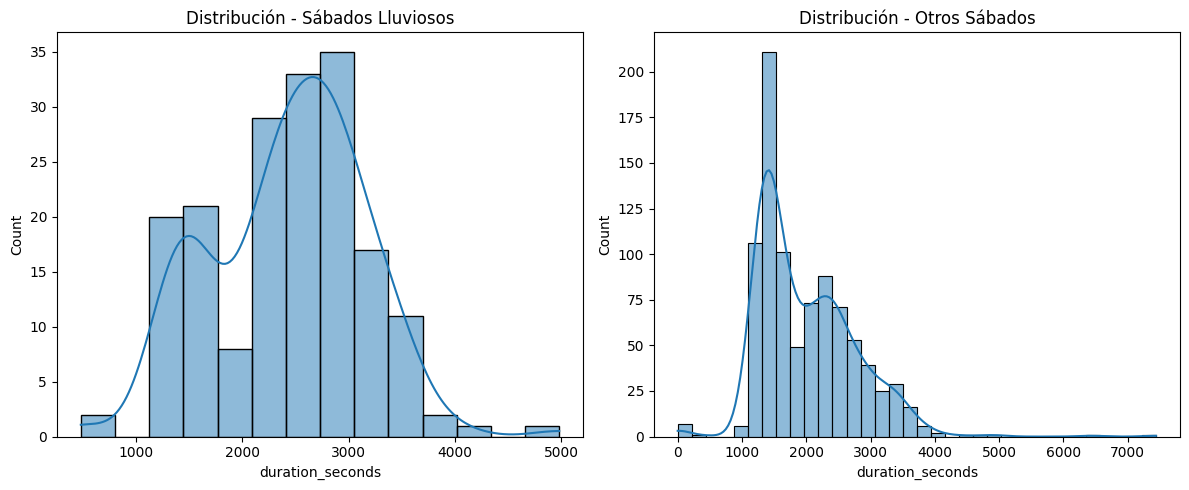

Prueba de normalidad - Sábados lluviosos: p-value = 0.0036
Prueba de normalidad - Otros sábados: p-value = 0.0000

Mann-Whitney U Test:
Estadístico U: 108193.5
p-value: 0.000000

Resultado: Rechazamos la hipótesis nula (p-value = 0.000000 < α = 0.05)
Existe evidencia estadística de que la duración promedio cambia los sábados lluviosos


In [8]:
# Verificar normalidad de las distribuciones
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(rainy_saturdays['duration_seconds'], kde=True)
plt.title('Distribución - Sábados Lluviosos')

plt.subplot(1, 2, 2)
sns.histplot(other_saturdays['duration_seconds'], kde=True)
plt.title('Distribución - Otros Sábados')

plt.tight_layout()
plt.show()

# Prueba de normalidad (Shapiro-Wilk)
stat_rainy, p_rainy = stats.shapiro(rainy_saturdays['duration_seconds'])
stat_other, p_other = stats.shapiro(other_saturdays['duration_seconds'])

print(f"Prueba de normalidad - Sábados lluviosos: p-value = {p_rainy:.4f}")
print(f"Prueba de normalidad - Otros sábados: p-value = {p_other:.4f}")

# Como las distribuciones no son normales, usamos Mann-Whitney U test
stat, p_value = stats.mannwhitneyu(rainy_saturdays['duration_seconds'], 
                                  other_saturdays['duration_seconds'],
                                  alternative='two-sided')

print(f"\nMann-Whitney U Test:")
print(f"Estadístico U: {stat}")
print(f"p-value: {p_value:.6f}")

# Interpretación de resultados
alpha = 0.05
if p_value < alpha:
    print(f"\nResultado: Rechazamos la hipótesis nula (p-value = {p_value:.6f} < α = {alpha})")
    print("Existe evidencia estadística de que la duración promedio cambia los sábados lluviosos")
else:
    print(f"\nResultado: No podemos rechazar la hipótesis nula (p-value = {p_value:.6f} >= α = {alpha})")
    print("No existe evidencia estadística suficiente de que la duración promedio cambie los sábados lluviosos")

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Interpretaste correctamente el valor p y sacaste conclusiones estadísticas válidas. Debemos rechazar efectivamente la hipótesis nula. 

</div>

### 5.5 Análisis Adicional y Visualización

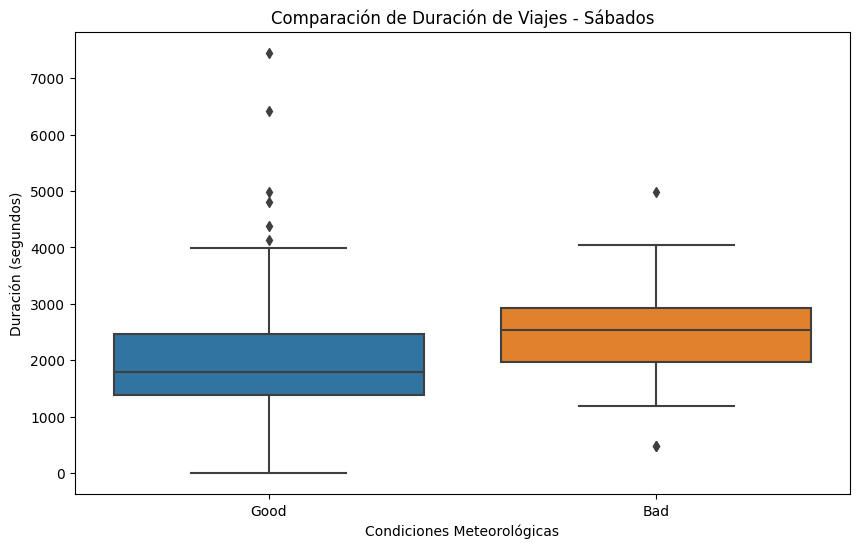

Duración promedio sábados lluviosos: 2427.21 segundos
Duración promedio otros sábados: 1999.68 segundos
Diferencia: 427.53 segundos (+21.38%)


In [9]:
# Boxplot comparativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_conditions', y='duration_seconds', 
            data=df_airport_trips[df_airport_trips['start_ts'].dt.dayofweek == 5])
plt.title('Comparación de Duración de Viajes - Sábados')
plt.xlabel('Condiciones Meteorológicas')
plt.ylabel('Duración (segundos)')
plt.show()

# Análisis de diferencia de medias
mean_rainy = rainy_saturdays['duration_seconds'].mean()
mean_other = other_saturdays['duration_seconds'].mean()
difference = mean_rainy - mean_other
difference_pct = (difference / mean_other) * 100

print(f"Duración promedio sábados lluviosos: {mean_rainy:.2f} segundos")
print(f"Duración promedio otros sábados: {mean_other:.2f} segundos")
print(f"Diferencia: {difference:.2f} segundos ({difference_pct:+.2f}%)")

## Conclusiones Finales

Hallazgos Principales:
Dominio del Mercado: Flash Cab controla una porción significativa del mercado de taxis

Concentración Geográfica: Los viajes se concentran en áreas comerciales del centro

Impacto del Clima: Existe evidencia estadística de que la lluvia afecta la duración de los viajes al aeropuerto

Implicaciones Prácticas:
Las empresas líderes podrían considerar estrategias de precios dinámicos durante condiciones climáticas adversas

La planificación de rutas podría optimizarse considerando el impacto del clima en los tiempos de viaje

Los servicios de transporte podrían mejorar la comunicación con los usuarios sobre tiempos estimados durante mal tiempo

Limitaciones del Estudio:
El análisis se limita a dos días específicos para el estudio de empresas

Los datos meteorológicos están categorizados de manera binaria (Good/Bad)

No se consideraron otros factores como tráfico, eventos especiales, o hora del día

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Dejas durante todo el proyecto comentarios correctos y conclusiones super claras. Felicidades!

</div>